In [22]:
import pandas as pd
import re
import emoji

# Membaca dataset dari file CSV
df = pd.read_csv("dataset_instagram_naive_bayes.csv")

# Menampilkan data dari dataset
print(df.head())



                  id                                               text
0  17970412394014977  Kalau cuma punya certificate AI tapi gak ada D...
1  17959664516499709  Kak buat studi independen batch 4 skrg buka ga...
2  18337423543043798  @swunoei Hi Kak, sudah dibuka kak, silakan daf...
3  17983186546875183  @nahrul.k Hi kak, tidak masalah kak, boleh sal...
4  18175546870254425  @maribelajar_id astagfirullah 😢, batesnya 8 Ja...


In [23]:
def tweet_cleaner(words):
    # menghapus emoji
    words = emoji.replace_emoji(words, replace="")
    # mengubah jadi huruf kecil
    words = words.lower()
    # menghapus semua hasttag dan mention
    words = re.sub("@[A-Za-z0-9]+", "", words)
    words = re.sub("#[A-Za-z0-9_]+", "", words)
    # menghapus semua link
    words = re.sub(r"http\S+", "", words)
    words = re.sub(r"www.\S+", "", words)
    # menghapus karakter yang bukan karakter asli(typo)
    words = re.sub('\W+', ' ', words)
    return words

<>:13: SyntaxWarning: invalid escape sequence '\W'
<>:13: SyntaxWarning: invalid escape sequence '\W'
C:\Users\patri\AppData\Local\Temp\ipykernel_16068\808317297.py:13: SyntaxWarning: invalid escape sequence '\W'
  words = re.sub('\W+', ' ', words)


In [24]:
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

#Penambahan simbol di akhir kalimat

def Preprocessing(input):
    #Handle duplicate symbols
#for i in range(len(data['DataAsli'])):
   # n, g in data.groupby(pd.Grouper(key='Tanggal',freq='W'))]
# weeks = [g for n, g in data.groupby(['Kategori'])]
    case_folding = input.lower()

    keep_word = re.sub(r"\d+", " ",case_folding)

    punctuation = re.sub(r'[^\w\s]','',keep_word)
    whitespace = re.sub('\s+',' ',punctuation)
    single_char = re.sub(r"\b[a-zA-Z]\b", "", whitespace)
    # menghapus emoticon yg terdapat pada kata
    rem_emoticon = single_char.encode('ascii', 'replace').decode('ascii')
    # proses tokenize
    tokens = nltk.tokenize.word_tokenize(rem_emoticon)
    stop = [word for word in tokens if not word in data]
    return stop

<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
C:\Users\patri\AppData\Local\Temp\ipykernel_16068\2268044122.py:19: SyntaxWarning: invalid escape sequence '\s'
  whitespace = re.sub('\s+',' ',punctuation)


In [25]:
df.head()

,id,text
0,17970412394014977,Kalau cuma punya certificate AI tapi gak ada D...
1,17959664516499709,Kak buat studi independen batch 4 skrg buka ga...
2,18337423543043798,"@swunoei Hi Kak, sudah dibuka kak, silakan daf..."
3,17983186546875183,"@nahrul.k Hi kak, tidak masalah kak, boleh sal..."
4,18175546870254425,"@maribelajar_id astagfirullah 😢, batesnya 8 Ja..."


In [26]:
#menghilangkan data redundan
df['id'] = df['text'].factorize()[0]
from io import StringIO
category_id_df = df[['text', 'id']].drop_duplicates().sort_values('id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['id', 'text']].values)

In [27]:
df.head()

,id,text
0,0,Kalau cuma punya certificate AI tapi gak ada D...
1,1,Kak buat studi independen batch 4 skrg buka ga...
2,2,"@swunoei Hi Kak, sudah dibuka kak, silakan daf..."
3,3,"@nahrul.k Hi kak, tidak masalah kak, boleh sal..."
4,4,"@maribelajar_id astagfirullah 😢, batesnya 8 Ja..."


In [28]:

import seaborn as sns

In [29]:
# mendefinisikan sentiment
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# membuat compound dengan vader
df['compound'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# menghitung tingkat sentiment
df['sentiment'] = df['compound'].map(lambda x: "neutral" if -0.05 <= x <= 0.05 else ("positive" if x > 0.05 else "negative"))
df.head()




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,text,compound,sentiment
0,0,Kalau cuma punya certificate AI tapi gak ada D...,0.0,neutral
1,1,Kak buat studi independen batch 4 skrg buka ga...,0.0,neutral
2,2,"@swunoei Hi Kak, sudah dibuka kak, silakan daf...",0.0,neutral
3,3,"@nahrul.k Hi kak, tidak masalah kak, boleh sal...",0.0,neutral
4,4,"@maribelajar_id astagfirullah 😢, batesnya 8 Ja...",0.0,neutral


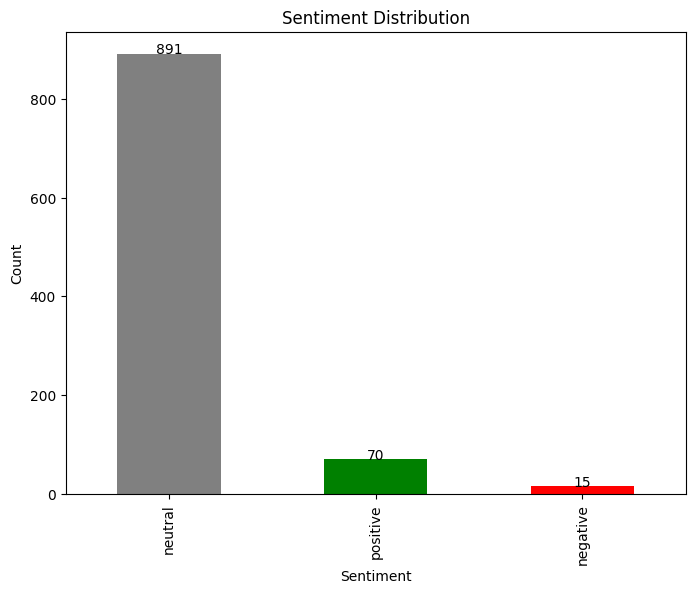

In [30]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'compound' and 'sentiment' columns

# Count the number of occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['gray', 'green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the count above each bar
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()
